# Model

In [1]:
#importing libraries
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import pandas as pd
import numpy as np
import random as rnd
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.gridspec as gridspec
from sklearn.preprocessing import StandardScaler
from numpy import genfromtxt
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score , average_precision_score
from sklearn.metrics import precision_score, precision_recall_curve
%matplotlib inline
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

## Data Cleaning & Loading

In [2]:
#we changes the name of the data set for our convinience
train = pd.read_csv("/Users/raunakpandey/tensorflow-test/weldright/Submission/NEWDATA.csv")

/var/folders/56/8qxbxkps1g73zstry__01qrc0000gn/T/ipykernel_42115/1863539859.py:1: DtypeWarning:

Columns (0,2,3,6,7,8,9,10,11,22,27,32,37,42,47,52,57,62,67,72,77,82,87) have mixed types. Specify dtype option on import or set low_memory=False.



In [3]:
train.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,...,Unnamed: 78,Unnamed: 79,Unnamed: 80,Unnamed: 81,Unnamed: 82,Unnamed: 83,Unnamed: 84,Unnamed: 85,Unnamed: 86,Unnamed: 87
0,(Office id of employee),(Welding machine name),(Project order number),(This captures the activity to be performed by...,(date of activity),(Timestamp for the activity),(In Ampere),(Relative humidity in %),(in degree celsius),(in liters per min (LPM)),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:129,27.85,84,24,3.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:630,27.38,84,24,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:127,26.89,84,24,3.08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:630,27.86,84,24,3.05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
train=train.drop([0])

In [5]:
train.drop(train.iloc[:, 13:88], inplace=True, axis=1)

In [6]:
train.head()

,Employee Code,Machine,Production,Order Operation No,Date,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect
1,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:129,27.85,84,24,3.12,30.1,9.122,No Defect
2,383138,TWLD23,E10002436,40,22-08-2022,10:44:10:630,27.38,84,24,3.08,30.1,9.129,No Defect
3,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:127,26.89,84,24,3.08,29.3,9.17,No Defect
4,383138,TWLD23,E10002436,40,22-08-2022,10:44:11:630,27.86,84,24,3.05,29.3,9.104,No Defect
5,383138,TWLD23,E10002436,40,22-08-2022,10:44:12:132,27.81,84,24,3.05,29.3,9.045,No Defect


In [7]:
train.isnull().sum().sort_values(ascending = False)

Current               3
Employee Code         0
Machine               0
Production            0
Order Operation No    0
Date                  0
Time                  0
Humidity              0
Temperature           0
Flow                  0
Job Temp              0
Voltage               0
Defect                0
dtype: int64

In [8]:
train['Date'].unique()

array(['22-08-2022', '23-08-2022', '24-08-2022', '25-08-2022',
       '26-08-2022', '27-08-2022', '29-08-2022', '30-08-2022',
       '01-09-2022', '02-09-2022', '03-09-2022', '05-09-2022',
       '06-09-2022', '07-09-2022', '08-09-2022', '09-09-2022',
       '10-09-2022', '12-09-2022', '13-09-2022', '14-09-2022',
       '15-09-2022', '16-09-2022', '17-09-2022', '19-09-2022'],
      dtype=object)

In [9]:
train['Production'].unique()

array(['E10002436', 'Test coopan', '-15003217', -15003217, -150033027,
       15003062, '15003062', 'E15003220', 'E15002881', 'E50006711',
       'E15003200', 'E15003202', 'E15003056', 'E15002963', 'E10002437',
       'E15003219', 'E15003201', 'E15002965', 'E15002966', '#NAME?', '-'],
      dtype=object)

In [10]:
train.drop(['Production'], axis=1,inplace=True)

In [11]:
train.dropna(inplace=True)

In [12]:
train.drop(['Machine'], axis=1,inplace=True)



#train['Order Operation No'] = train['Order Operation No'].astype(int)
train['Current'] = train['Current'].astype(float)
train['Humidity'] = train['Humidity'].astype(float)
train['Temperature'] = train['Temperature'].astype(float)
train['Flow'] = train['Flow'].astype(float)
train['Job Temp'] = train['Job Temp'].astype(float)
train['Voltage'] = train['Voltage'].astype(float)
train['Defect'] = train['Defect'].astype(str)
train['Date'] = train['Date'].astype(str)

In [13]:
train['date'] = train['Date'].str[:2]
train['month']=train.Date.str.slice(3,5)
train.drop(['Date'], axis=1,inplace=True)

In [14]:
train['Defectinitials'] = train['Defect'].str[:2]

In [15]:
train['Defectinitials'].unique()

array(['No', 'Po', 'Tu'], dtype=object)

In [16]:
train['Defectinitials'].value_counts()

No    821778
Tu      4610
Po      1143
Name: Defectinitials, dtype: int64

In [17]:
train['Order Operation No'].value_counts()

240     471055
180     128646
1        67310
180-     53238
40       39068
240      20413
130      15868
30       15473
40        8191
1         4424
130       1790
-240      1315
-          740
Name: Order Operation No, dtype: int64

In [18]:
train['porosity']=train['Defectinitials']=='Po'

In [19]:
train['tungsten']=train['Defectinitials']=='Tu'

In [20]:
old_values = ['Tu', 'Po']
new_values = ['Tu', 'Tu']

train['Defectinitials']=train.Defectinitials.replace(old_values, new_values)

In [21]:
train['Defectinitials'].unique()

array(['No', 'Tu'], dtype=object)

In [22]:
train.rename(columns={'Order Operation No': 'operationnumber',}, inplace=True)

In [23]:
train['operationnumber'].unique()

array(['40', 40, 1, '1', '180-', '240', 240, 30, 180, '-240', '-', '130',
       130], dtype=object)

In [24]:
train.rename(columns={'Employee Code': 'employeecode',}, inplace=True)

In [25]:
old_values = ['382617']
new_values = [382617]

train['employeecode']=train.employeecode.replace(old_values, new_values)

In [26]:
train['employeecode'] = train['employeecode'].astype(float)

In [27]:
train['employeecode'].unique()

array([383138.,      0., 394269.,  97346., 394965., 391342., 394365.,
       382617., 387268.])

In [28]:
old_values = ['240', '-240','-','130','1','180-']
new_values = [240,240,0,130,1,180]

train['operationnumber']=train.operationnumber.replace(old_values, new_values)

In [29]:
train['operationnumber'].unique()

array(['40', 40, 1, 180, 240, 30, 0, 130], dtype=object)

In [30]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
train['Defect'] = labelencoder.fit_transform(train['Defectinitials'])
train['porosity'] = labelencoder.fit_transform(train['porosity'])
train['tungsten'] = labelencoder.fit_transform(train['tungsten'])

In [31]:
train.head()

,employeecode,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month,Defectinitials,porosity,tungsten
1,383138.0,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08,No,0,0
2,383138.0,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08,No,0,0
3,383138.0,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08,No,0,0
4,383138.0,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08,No,0,0
5,383138.0,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08,No,0,0


In [32]:
# plot may not be visible when loaded again.
##Seeing the data imbalance
x = train['Defect'].value_counts().index
y = train['Defect'].value_counts().values

trace2 = go.Bar(
     x=x ,
     y=y,
     marker=dict(
         color=y,
         colorscale = 'Viridis',
         reversescale = True
     ),
     name="Imbalance",    
 )
layout = dict(
     title="Data imbalance",
     #width = 900, height = 500,
     xaxis=go.layout.XAxis(
     automargin=True),
     yaxis=dict(
         showgrid=False,
         showline=False,
         showticklabels=True,
 #         domain=[0, 0.85],
     ), 
)
fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [33]:
train.drop(['Defectinitials'], axis=1,inplace=True)

In [34]:
train.head()

,employeecode,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month,porosity,tungsten
1,383138.0,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08,0,0
2,383138.0,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08,0,0
3,383138.0,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08,0,0
4,383138.0,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08,0,0
5,383138.0,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08,0,0


In [35]:
train22=train.copy()

# **Feature Engineering**

In [36]:
train22.head()

,employeecode,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month,porosity,tungsten
1,383138.0,40,10:44:10:129,27.85,84.0,24.0,3.12,30.1,9.122,0,22,08,0,0
2,383138.0,40,10:44:10:630,27.38,84.0,24.0,3.08,30.1,9.129,0,22,08,0,0
3,383138.0,40,10:44:11:127,26.89,84.0,24.0,3.08,29.3,9.170,0,22,08,0,0
4,383138.0,40,10:44:11:630,27.86,84.0,24.0,3.05,29.3,9.104,0,22,08,0,0
5,383138.0,40,10:44:12:132,27.81,84.0,24.0,3.05,29.3,9.045,0,22,08,0,0


In [37]:
# step1
train22['processTime']=train22["Time"].apply(
    lambda x: ":".join( "0"*(2-len(str(s))) + str(s) for s in x.split(":")[:-1]))

In [38]:
# step2
train22['TimeR']=train22['Time'].apply(lambda x: x[::-1])

In [39]:
# step3
train22['processTime']=train22['processTime'] + '.' + train22['TimeR'].apply(lambda x: x.split(':', 1)[0])

In [40]:
# step4
train22['timeNEW']=pd.to_datetime(train22['processTime'], format="%H:%M:%S.%f")

In [41]:
train22['timeNEW'].info()

<class 'pandas.core.series.Series'>
Int64Index: 827531 entries, 1 to 827534
Series name: timeNEW
Non-Null Count   Dtype         
--------------   -----         
827531 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 12.6 MB


In [42]:
# creating new features
train22['porosityF']=(pow(train22['Flow'],1)*(pow(train22['Job Temp'],1)+273)*train22['Humidity'])
train22['HeatInput']=train22['Voltage']*train22['Current']/train22['Flow']
train22['power']=train22['Voltage']*train['Current']

## Summary of Features
**1.porosityF**: Porosity is linked to **gas flow,job temperature and humidity** ,according to the [research papers](https://www.twi-global.com/technical-knowledge/job-knowledge/defects-imperfections-in-welds-porosity-042).So creating a feature porosityF to increase likelihood of detection of porosity defect. <br />

**2.HeatInput**: According to the standard formula, heat input is calculated as the product of Voltage and Current divided by the Speed of welding.
However, since speed is unknown, a modified version of the formula is used where flow has replaced speed.<br/>

**3.power**: It can be calculated as the absolute value of the product of Voltage and Current. <br />

In [43]:
# drop infinities
with pd.option_context('mode.use_inf_as_na', True):train22.dropna(inplace=True)

In [44]:
# scaling for knn and svms
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
train22[['Current','Humidity','Temperature','Flow','Job Temp','Voltage','HeatInput','porosityF','power']] = scaler.fit_transform(
    train22[['Current','Humidity','Temperature','Flow','Job Temp','Voltage','HeatInput','porosityF','power']])


In [45]:
train22.head()

,employeecode,operationnumber,Time,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,date,month,porosity,tungsten,processTime,TimeR,timeNEW,porosityF,HeatInput,power
1,383138.0,40,10:44:10:129,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,22,08,0,0,10:44:10.921,921:01:44:01,1900-01-01 10:44:10.921,0.022990,0.026318,0.177555
2,383138.0,40,10:44:10:630,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,22,08,0,0,10:44:10.036,036:01:44:01,1900-01-01 10:44:10.036,0.022695,0.026316,0.175672
3,383138.0,40,10:44:11:127,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,22,08,0,0,10:44:11.721,721:11:44:01,1900-01-01 10:44:11.721,0.022635,0.026311,0.174122
4,383138.0,40,10:44:11:630,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,22,08,0,0,10:44:11.036,036:11:44:01,1900-01-01 10:44:11.036,0.022415,0.026327,0.177367
5,383138.0,40,10:44:12:132,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,22,08,0,0,10:44:12.231,231:21:44:01,1900-01-01 10:44:12.231,0.022415,0.026323,0.176403


In [46]:
train22.drop(['TimeR','processTime','Time','date','month'],axis=1,inplace=True)

In [47]:
train22.head()

,employeecode,operationnumber,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosity,tungsten,timeNEW,porosityF,HeatInput,power
1,383138.0,40,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,0,0,1900-01-01 10:44:10.921,0.022990,0.026318,0.177555
2,383138.0,40,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,0,0,1900-01-01 10:44:10.036,0.022695,0.026316,0.175672
3,383138.0,40,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,0,0,1900-01-01 10:44:11.721,0.022635,0.026311,0.174122
4,383138.0,40,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,0,0,1900-01-01 10:44:11.036,0.022415,0.026327,0.177367
5,383138.0,40,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,0,0,1900-01-01 10:44:12.231,0.022415,0.026323,0.176403


## Label Encoding 

Although label encoding for done for all categorical features. It was found to **decrease model** performance so it was not included in final model. 

In [48]:
def top_labels(df, col, max_col):
    top = list(df[col].value_counts().sort_values(ascending=False).head(max_col).index)
    print("Top Labels: ", top)
    for categories in top:
        df[col+ "_" +str(categories)]=np.where(df[col]==categories,1,0)
        print(col + "_" + str(categories))
    return top

In [49]:
train22['employeecode'].value_counts()

391342.0    162947
394965.0    142647
97346.0     105249
394269.0     78059
383138.0     23594
394365.0     22993
382617.0     15821
0.0          11213
387268.0      7835
Name: employeecode, dtype: int64

In [50]:
top_labels_emp = top_labels(train22, 'employeecode',9 )
train22 = train22.drop(['employeecode'], axis = 1)

Top Labels:  [391342.0, 394965.0, 97346.0, 394269.0, 383138.0, 394365.0, 382617.0, 0.0, 387268.0]
employeecode_391342.0
employeecode_394965.0
employeecode_97346.0
employeecode_394269.0
employeecode_383138.0
employeecode_394365.0
employeecode_382617.0
employeecode_0.0
employeecode_387268.0


In [51]:
train22.head()

,operationnumber,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosity,tungsten,...,power,employeecode_391342.0,employeecode_394965.0,employeecode_97346.0,employeecode_394269.0,employeecode_383138.0,employeecode_394365.0,employeecode_382617.0,employeecode_0.0,employeecode_387268.0
1,40,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,0,0,...,0.177555,0,0,0,0,1,0,0,0,0
2,40,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,0,0,...,0.175672,0,0,0,0,1,0,0,0,0
3,40,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,0,0,...,0.174122,0,0,0,0,1,0,0,0,0
4,40,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,0,0,...,0.177367,0,0,0,0,1,0,0,0,0
5,40,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,0,0,...,0.176403,0,0,0,0,1,0,0,0,0


In [52]:
train22['operationnumber'].value_counts()

240    315862
180    149466
1       43255
40      26829
130     14171
30      12500
40       8191
0          84
Name: operationnumber, dtype: int64

In [53]:
top_labels_emp = top_labels(train22, 'operationnumber', 8 )
train22 = train22.drop(['operationnumber'], axis = 1)

Top Labels:  [240, 180, 1, 40, 130, 30, '40', 0]
operationnumber_240
operationnumber_180
operationnumber_1
operationnumber_40
operationnumber_130
operationnumber_30
operationnumber_40
operationnumber_0


In [54]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosity,tungsten,timeNEW,...,employeecode_382617.0,employeecode_0.0,employeecode_387268.0,operationnumber_240,operationnumber_180,operationnumber_1,operationnumber_40,operationnumber_130,operationnumber_30,operationnumber_0
1,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,0,0,1900-01-01 10:44:10.921,...,0,0,0,0,0,0,1,0,0,0
2,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,0,0,1900-01-01 10:44:10.036,...,0,0,0,0,0,0,1,0,0,0
3,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,0,0,1900-01-01 10:44:11.721,...,0,0,0,0,0,0,1,0,0,0
4,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,0,0,1900-01-01 10:44:11.036,...,0,0,0,0,0,0,1,0,0,0
5,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,0,0,1900-01-01 10:44:12.231,...,0,0,0,0,0,0,1,0,0,0


In [55]:
#dropping the label encoded columns
train22.drop(train22.iloc[:, 13:30], inplace=True, axis=1)

In [56]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosity,tungsten,timeNEW,porosityF,HeatInput,power
1,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,0,0,1900-01-01 10:44:10.921,0.022990,0.026318,0.177555
2,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,0,0,1900-01-01 10:44:10.036,0.022695,0.026316,0.175672
3,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,0,0,1900-01-01 10:44:11.721,0.022635,0.026311,0.174122
4,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,0,0,1900-01-01 10:44:11.036,0.022415,0.026327,0.177367
5,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,0,0,1900-01-01 10:44:12.231,0.022415,0.026323,0.176403


In [57]:
train22.drop(['porosity','tungsten'],axis=1,inplace=True)

In [58]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power
1,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,1900-01-01 10:44:10.921,0.022990,0.026318,0.177555
2,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,1900-01-01 10:44:10.036,0.022695,0.026316,0.175672
3,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,1900-01-01 10:44:11.721,0.022635,0.026311,0.174122
4,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,1900-01-01 10:44:11.036,0.022415,0.026327,0.177367
5,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,1900-01-01 10:44:12.231,0.022415,0.026323,0.176403


## Checking how features relate to two defects

In [59]:
trainy=train22[train22['Defect']==1]

In [60]:
trainn=train22[train22['Defect']==0]

In [61]:
trainy.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power
346,0.010526,0.267516,0.260563,0.222683,0.031220,0.095277,1,1900-01-01 10:47:12.779,0.029470,0.025906,0.060745
794,0.169293,0.232484,0.253521,0.304979,0.008637,0.414480,1,1900-01-01 16:46:31.803,0.028136,0.026155,0.160741
1925,0.013641,0.251592,0.246479,0.314661,0.008637,0.095277,1,1900-01-01 17:24:15.755,0.031413,0.025906,0.060745
2254,0.163127,0.251592,0.246479,0.302213,0.008271,0.451770,1,1900-01-01 17:27:12.906,0.030053,0.026176,0.168033
2255,0.165369,0.251592,0.246479,0.302213,0.008271,0.431444,1,1900-01-01 17:27:13.721,0.030053,0.026164,0.163421


In [62]:
trainn.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power
1,0.185923,0.267516,0.260563,0.215076,0.009186,0.432404,0,1900-01-01 10:44:10.921,0.022990,0.026318,0.177555
2,0.182996,0.267516,0.260563,0.212310,0.009186,0.432663,0,1900-01-01 10:44:10.036,0.022695,0.026316,0.175672
3,0.179944,0.267516,0.260563,0.212310,0.008942,0.434178,0,1900-01-01 10:44:11.721,0.022635,0.026311,0.174122
4,0.185986,0.267516,0.260563,0.210235,0.008942,0.431739,0,1900-01-01 10:44:11.036,0.022415,0.026327,0.177367
5,0.185674,0.267516,0.260563,0.210235,0.008942,0.429559,0,1900-01-01 10:44:12.231,0.022415,0.026323,0.176403


In [63]:
trainy['porosityF'].describe()

count    4154.000000
mean        0.031994
std         0.059114
min         0.000000
25%         0.006885
50%         0.018370
75%         0.025969
max         0.400398
Name: porosityF, dtype: float64

In [64]:
trainn['porosityF'].describe()

count    566204.000000
mean          0.026416
std           0.050499
min           0.000000
25%           0.007956
50%           0.018504
75%           0.023506
max           1.000000
Name: porosityF, dtype: float64

## Exploratory Data Analysis

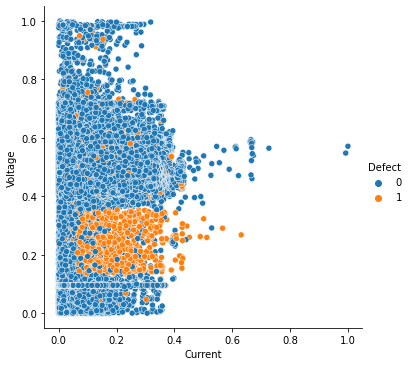

In [65]:
sns.relplot(data=train22, x="Current", y="Voltage", hue="Defect")

## Conclusion
The current and voltages neatly seperate the defective points in a seperate cluster. This information would prove to be crutial for the model.

## Calculating Time Differences and analysing them

In [66]:
train22=train22.dropna()

In [67]:
df=train22.copy()

In [68]:
df=df.sort_values(by='timeNEW')

In [69]:
df.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power
597256,0.044908,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:03.782,0.000204,0.025906,0.060745
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,1900-01-01 00:00:04.039,0.000407,0.025906,0.060745
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,1900-01-01 00:00:05.994,0.000272,0.025906,0.060745
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:07.537,0.000204,0.025906,0.060745
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,1900-01-01 00:00:10.046,0.000407,0.025906,0.060745


In [70]:
train22=df.copy()

In [71]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power
597256,0.044908,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:03.782,0.000204,0.025906,0.060745
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,1900-01-01 00:00:04.039,0.000407,0.025906,0.060745
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,1900-01-01 00:00:05.994,0.000272,0.025906,0.060745
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:07.537,0.000204,0.025906,0.060745
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,1900-01-01 00:00:10.046,0.000407,0.025906,0.060745


In [72]:
train22['diff'] = train22['timeNEW'] - train22['timeNEW'].shift(1)

In [73]:
train22['diff']

597256                      NaT
597277   0 days 00:00:00.257000
597296   0 days 00:00:01.955000
597317   0 days 00:00:01.543000
597220   0 days 00:00:02.509000
                  ...          
596916   0 days 00:00:00.816000
596923   0 days 00:00:03.293000
596934   0 days 00:00:06.306000
596948   0 days 00:00:06.407000
596949   0 days 00:00:00.105000
Name: diff, Length: 570358, dtype: timedelta64[ns]

In [74]:
train22['diff'].dropna(inplace=True)

In [75]:
train22.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 570358 entries, 597256 to 596949
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   Current      570358 non-null  float64        
 1   Humidity     570358 non-null  float64        
 2   Temperature  570358 non-null  float64        
 3   Flow         570358 non-null  float64        
 4   Job Temp     570358 non-null  float64        
 5   Voltage      570358 non-null  float64        
 6   Defect       570358 non-null  int64          
 7   timeNEW      570358 non-null  datetime64[ns] 
 8   porosityF    570358 non-null  float64        
 9   HeatInput    570358 non-null  float64        
 10  power        570358 non-null  float64        
 11  diff         570357 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(9), int64(1), timedelta64[ns](1)
memory usage: 56.6 MB


In [76]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power,diff
597256,0.044908,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:03.782,0.000204,0.025906,0.060745,NaT
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,1900-01-01 00:00:04.039,0.000407,0.025906,0.060745,0 days 00:00:00.257000
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,1900-01-01 00:00:05.994,0.000272,0.025906,0.060745,0 days 00:00:01.955000
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:07.537,0.000204,0.025906,0.060745,0 days 00:00:01.543000
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,1900-01-01 00:00:10.046,0.000407,0.025906,0.060745,0 days 00:00:02.509000


In [77]:
# Dropping unnecessary value
train22.drop([491453])

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,timeNEW,porosityF,HeatInput,power,diff
597256,0.044908,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:03.782,0.000204,0.025906,0.060745,NaT
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,1900-01-01 00:00:04.039,0.000407,0.025906,0.060745,0 days 00:00:00.257000
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,1900-01-01 00:00:05.994,0.000272,0.025906,0.060745,0 days 00:00:01.955000
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,1900-01-01 00:00:07.537,0.000204,0.025906,0.060745,0 days 00:00:01.543000
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,1900-01-01 00:00:10.046,0.000407,0.025906,0.060745,0 days 00:00:02.509000
...,...,...,...,...,...,...,...,...,...,...,...,...
596916,0.031143,0.248408,0.260563,0.001383,0.008454,0.095277,0,1900-01-01 23:59:17.077,0.000204,0.025906,0.060745,0 days 00:00:00.816000
596923,0.043912,0.248408,0.260563,0.003458,0.008454,0.095277,0,1900-01-01 23:59:20.370,0.000407,0.025906,0.060745,0 days 00:00:03.293000
596934,0.044597,0.248408,0.260563,0.003458,0.008423,0.095277,0,1900-01-01 23:59:26.676,0.000407,0.025906,0.060745,0 days 00:00:06.306000
596948,0.041732,0.248408,0.260563,0.000000,0.008576,0.095277,0,1900-01-01 23:59:33.083,0.000068,0.025906,0.060745,0 days 00:00:06.407000


In [78]:
# Data type conversion
train22['diffFloat']=train22[('diff')].values.astype("float64")

### Feature Creation
Technically defined as the speed with which the welder performs the welds, here information about the length of each weld was not given so it was assumed that each weld length is the same.
So here speed was just calculated as inverse of time difference.

In [79]:
train22['speed']=1e9/(train22['diffFloat'])

In [80]:
# drop infinities
with pd.option_context('mode.use_inf_as_na', True):train22.dropna(inplace=True)

In [81]:
train22.drop(['timeNEW'],axis=1,inplace=True)

In [82]:
train22.drop(['diff'],axis=1,inplace=True)

In [83]:
train22['speed'].describe()

count    567136.000000
mean         54.480500
std         125.097087
min           0.000424
25%           8.264463
50%          16.393443
75%          41.666667
max        1000.000000
Name: speed, dtype: float64

In [84]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosityF,HeatInput,power,diffFloat,speed
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,0.000407,0.025906,0.060745,2.570000e+08,3.891051
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,0.000272,0.025906,0.060745,1.955000e+09,0.511509
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,0.000204,0.025906,0.060745,1.543000e+09,0.648088
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,0.000407,0.025906,0.060745,2.509000e+09,0.398565
597219,0.036001,0.248408,0.260563,0.003458,0.008332,0.095277,0,0.000407,0.025906,0.060745,6.950000e+08,1.438849


In [85]:
train22.drop(['diffFloat'],axis=1,inplace=True)

In [86]:
train22[['speed']] = scaler.fit_transform(
    train22[['speed']])

In [87]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosityF,HeatInput,power,speed
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,0.000407,0.025906,0.060745,0.003891
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,0.000272,0.025906,0.060745,0.000511
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,0.000204,0.025906,0.060745,0.000648
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,0.000407,0.025906,0.060745,0.000398
597219,0.036001,0.248408,0.260563,0.003458,0.008332,0.095277,0,0.000407,0.025906,0.060745,0.001438


In [88]:
train22.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosityF,HeatInput,power,speed
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0,0.000407,0.025906,0.060745,0.003891
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0,0.000272,0.025906,0.060745,0.000511
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0,0.000204,0.025906,0.060745,0.000648
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0,0.000407,0.025906,0.060745,0.000398
597219,0.036001,0.248408,0.260563,0.003458,0.008332,0.095277,0,0.000407,0.025906,0.060745,0.001438


## Feature Importance

In [89]:
train=train22.copy()
train.drop(['Defect'],axis=1,inplace=True)
train['Defect']=train22['Defect']

In [90]:
train.head()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,porosityF,HeatInput,power,speed,Defect
597277,0.050950,0.248408,0.260563,0.003458,0.008362,0.095277,0.000407,0.025906,0.060745,0.003891,0
597296,0.045531,0.248408,0.260563,0.002075,0.008484,0.095277,0.000272,0.025906,0.060745,0.000511,0
597317,0.031268,0.248408,0.260563,0.001383,0.008393,0.095277,0.000204,0.025906,0.060745,0.000648,0
597220,0.043600,0.248408,0.260563,0.003458,0.008454,0.095277,0.000407,0.025906,0.060745,0.000398,0
597219,0.036001,0.248408,0.260563,0.003458,0.008332,0.095277,0.000407,0.025906,0.060745,0.001438,0


In [91]:
v_features = train.iloc[:,1:10].columns

In [92]:
rnd_clf = RandomForestClassifier(n_estimators = 100 , criterion = 'entropy',random_state = 0)
rnd_clf.fit(train.iloc[:,1:10],train.iloc[:,10]);

In [93]:
# plot may not be visible when loaded again.
x, y = (list(x) for x in zip(*sorted(zip(rnd_clf.feature_importances_, train.iloc[:,1:10].columns), 
                                                            reverse = False)))
trace2 = go.Bar(
    x=x ,
    y=y,
    marker=dict(
        color=x,
        colorscale = 'Viridis',
        reversescale = True
    ),
    name='Random Forest Feature importance',
    orientation='h',
)

layout = dict(
    title='Barplot of Feature importances',
     width = 600, height = 1000,
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
#         domain=[0, 0.85],
    ),
    margin=dict(
    l=300,
),
)

fig1 = go.Figure(data=[trace2], layout=layout)
iplot(fig1)

In [94]:
#However it was found during various runs that removing speed gave the best model performance
train22.drop(['speed'],inplace=True,axis=1)

In [95]:
train22.describe()

,Current,Humidity,Temperature,Flow,Job Temp,Voltage,Defect,porosityF,HeatInput,power
count,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000,567136.000000
mean,0.071760,0.238188,0.259644,0.176225,0.051207,0.219171,0.007279,0.026454,0.026923,0.098142
std,0.085077,0.028689,0.021833,0.106359,0.193493,0.176755,0.085004,0.050561,0.009587,0.063085
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.014077,0.229299,0.260563,0.088520,0.009186,0.095277,0.000000,0.007932,0.025906,0.060745
50%,0.026783,0.242038,0.260563,0.190180,0.009644,0.095277,0.000000,0.018504,0.025906,0.060745
75%,0.127998,0.251592,0.267606,0.233057,0.011414,0.427489,0.000000,0.023518,0.026179,0.136002
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Model Fitting

In [96]:
y= train22['Defect']
X=train22.drop(['Defect'],axis=1)

In [97]:
from sklearn.model_selection import StratifiedKFold

skf=StratifiedKFold(n_splits=5, random_state=None, shuffle=True)

for train_index, test_index in skf.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [98]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train, y_train = sm.fit_sample(X_train, y_train.ravel())

In [99]:
from pyod.models.abod import ABOD
clf = ABOD()
clf.fit(X_train)

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning:

invalid value encountered in true_divide

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



ABOD(contamination=0.1, method='fast', n_neighbors=5)

In [100]:
pred = clf.predict(X_test)

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3723: RuntimeWarning:

Degrees of freedom <= 0 for slice

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:222: RuntimeWarning:

invalid value encountered in true_divide

/Users/raunakpandey/tensorflow-test/env/lib/python3.8/site-packages/numpy/core/_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



In [101]:
f1_score(y_test, pred, average='weighted')

0.989089980985016

In [102]:
f1_score(y_test, pred, average='micro')

0.9927177832438485

In [103]:
f1_score(y_test, pred, average='macro')

0.4981727927513406

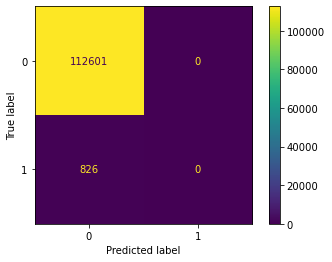

In [104]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()

plt.show()

In [105]:
from sklearn.ensemble import RandomForestClassifier

clfFinal = RandomForestClassifier(max_depth=2, random_state=0)
clfFinal.fit(X_train, y_train)
pred=clfFinal.predict(X_test)

In [106]:
from sklearn.metrics import f1_score
f1_score(y_test, pred, average='weighted')

0.7897426326151074

In [107]:
f1_score(y_test, pred, average='micro')

0.6621703827131107

In [108]:
f1_score(y_test, pred, average='macro')

0.4146831036218226

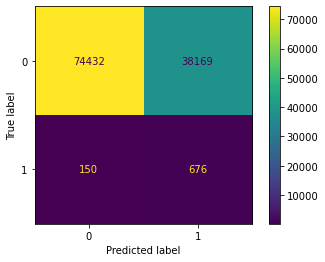

In [109]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              )
disp.plot()

plt.show()

## Conclusion
The problem statement has asked us to provide with the weighted F1 score of the model.
However it doesn't tell the full story.
It is heavily biased due to severity of class imbalance that is present even after successive data cleaning.
Although the model ABOD "performs" better according to the F1 score(~0.99) but it performs poorly during the actual detection of defects. Hence the model Random Forest Classifier is much better and should be considered.
This model is able to **succesfully detect 676 defects** even before they have happened.

### Saving the model

In [110]:
import joblib
# save the model to disk
filename = 'ABOD.sav'
joblib.dump(clf, filename)

['ABOD.sav']

In [111]:
import joblib
# save the model to disk
filename = 'Random_Forest.sav'
joblib.dump(clfFinal, filename)

['Random_Forest.sav']

In [112]:
# Uncomment this to loead the model
# # load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, y_test)
# print(result)

# Conclusion
**The model is able to predict defects about 60% of the time even before they have occured.<br />
the f1 score of model is 0.13. The model when applied to practical uses will help in significant reduction of errors and help save companies resources.**